# 板情報の可視化

```{attention} ToDo:
解説を書く
```

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [2]:
df =pd.read_pickle("btcusd_2020-07-08.pickle")

In [3]:
bid_last = df.groupby("side").get_group("bid").iloc[-10000:, :]
ask_last = df.groupby("side").get_group("ask").iloc[-10000:, :]

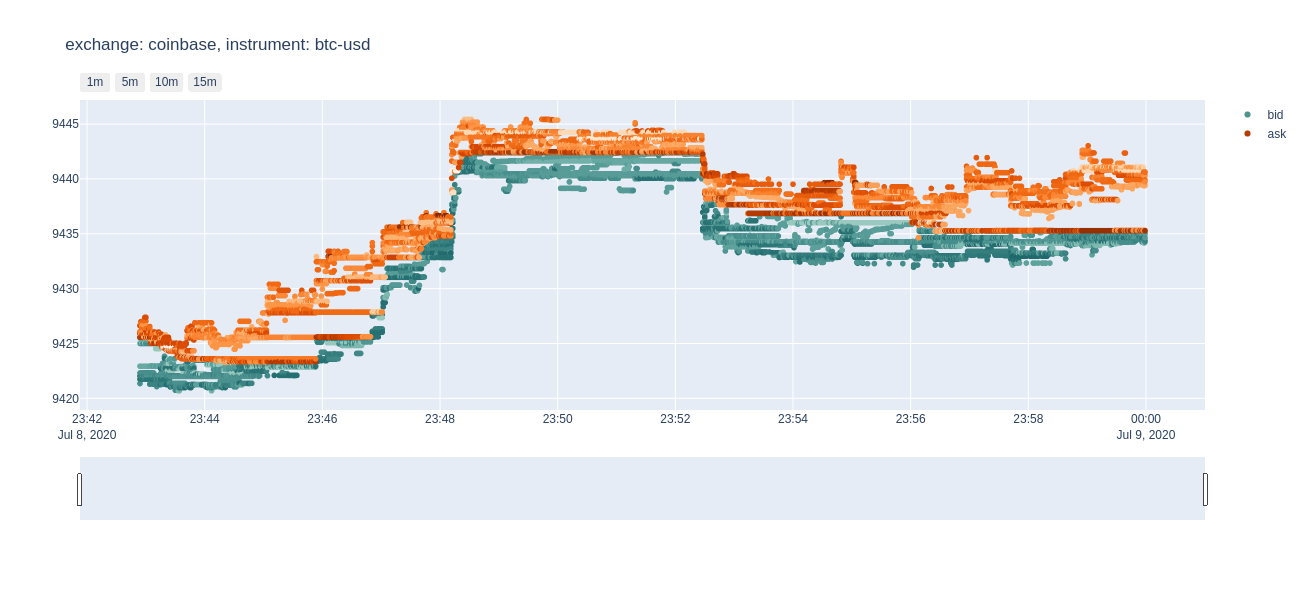

In [4]:
fig = go.Figure(
    [
        go.Scattergl(
            mode="markers",
            x=bid_last.loc[:, "timestamp"],
            y=bid_last.loc[:, "price"],
            name="bid",
            marker={
                "color": np.log(bid_last.loc[:, "size"]),
                "colorscale": "Mint",
            },
        ),
        go.Scattergl(
            mode="markers",
            x=ask_last.loc[:, "timestamp"],
            y=ask_last.loc[:, "price"],
            name="ask",
            marker={
                "color": np.log(ask_last.loc[:, "size"]),
                "colorscale": "Oranges",
            },
        ),
    ],
    layout=go.Layout(title="exchange: coinbase, instrument: btc-usd", height=600),
)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector={
        "buttons": [
            {"count": 1, "label": "1m", "step": "minute"},
            {"count": 5, "label": "5m", "step": "minute"},
            {"count": 10, "label": "10m", "step": "minute"},
            {"count": 15, "label": "15m", "step": "minute"},
        ]
    },
)
fig.show()